In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from collections import namedtuple

In [2]:
data_url = "https://github.com/QuantEcon/lecture-python-intro/raw/main/lectures/datasets/mpd2020.xlsx"
data = pd.read_excel(data_url, 
                     sheet_name='Full data')
data.head()

,countrycode,country,year,gdppc,pop
0,AFG,Afghanistan,1820,NaN,3280.0
1,AFG,Afghanistan,1870,NaN,4207.0
2,AFG,Afghanistan,1913,NaN,5730.0
3,AFG,Afghanistan,1950,1156.0,8150.0
4,AFG,Afghanistan,1951,1170.0,8284.0


In [3]:
countries = data.country.unique()
len(countries)

169

In [4]:
country_years = []
for country in countries:
    cy_data = data[data.country == country]['year']
    ymin, ymax = cy_data.min(), cy_data.max()
    country_years.append((country, ymin, ymax))
country_years = pd.DataFrame(country_years,
                    columns=['country', 'min_year', 'max_year']).set_index('country')
country_years.head()

,min_year,max_year
country,,
Afghanistan,1820,2018
Angola,1950,2018
Albania,1,2018
United Arab Emirates,1950,2018
Argentina,1800,2018


In [5]:
code_to_name = data[
    ['countrycode', 'country']].drop_duplicates().reset_index(drop=True).set_index(['countrycode'])

In [6]:
gdp_pc = data.set_index(['countrycode', 'year'])['gdppc']
gdp_pc = gdp_pc.unstack('countrycode')

In [7]:
gdp_pc.tail()

countrycode,AFG,AGO,ALB,ARE,ARG,ARM,AUS,AUT,AZE,BDI,...,URY,USA,UZB,VEN,VNM,YEM,YUG,ZAF,ZMB,ZWE
year,,,,,,,,,,,,,,,,,,,,,
2014,2022.0000,8673.0000,9808.0000,72601.0000,19183.0000,9735.0000,47867.0000,41338.0000,17439.0000,748.0000,...,19160.0000,51664.0000,9085.0000,20317.0000,5455.0000,4054.0000,14627.0000,12242.0000,3478.0000,1594.0000
2015,1928.0000,8689.0000,10032.0000,74746.0000,19502.0000,10042.0000,48357.0000,41294.0000,17460.0000,694.0000,...,19244.0000,52591.0000,9720.0000,18802.0000,5763.0000,2844.0000,14971.0000,12246.0000,3478.0000,1560.0000
2016,1929.0000,8453.0000,10342.0000,75876.0000,18875.0000,10080.0000,48845.0000,41445.0000,16645.0000,665.0000,...,19468.0000,53015.0000,10381.0000,15219.0000,6062.0000,2506.0000,15416.0000,12139.0000,3479.0000,1534.0000
2017,2014.7453,8146.4354,10702.1201,76643.4984,19200.9061,10859.3783,49265.6135,42177.3706,16522.3072,671.3169,...,19918.1361,54007.7698,10743.8666,12879.1350,6422.0865,2321.9239,15960.8432,12189.3579,3497.5818,1582.3662
2018,1934.5550,7771.4418,11104.1665,76397.8181,18556.3831,11454.4251,49830.7993,42988.0709,16628.0553,651.3589,...,20185.8360,55334.7394,11220.3702,10709.9506,6814.1423,2284.8899,16558.3123,12165.7948,3534.0337,1611.4052


In [8]:
country_names = data['countrycode']

# Generate a colormap with the number of colors matching the number of countries
colors = cm.tab20(np.linspace(0, 0.95, len(country_names)))

# Create a dictionary to map each country to its corresponding color
color_mapping = {country: color for 
                 country, color in zip(country_names, colors)}

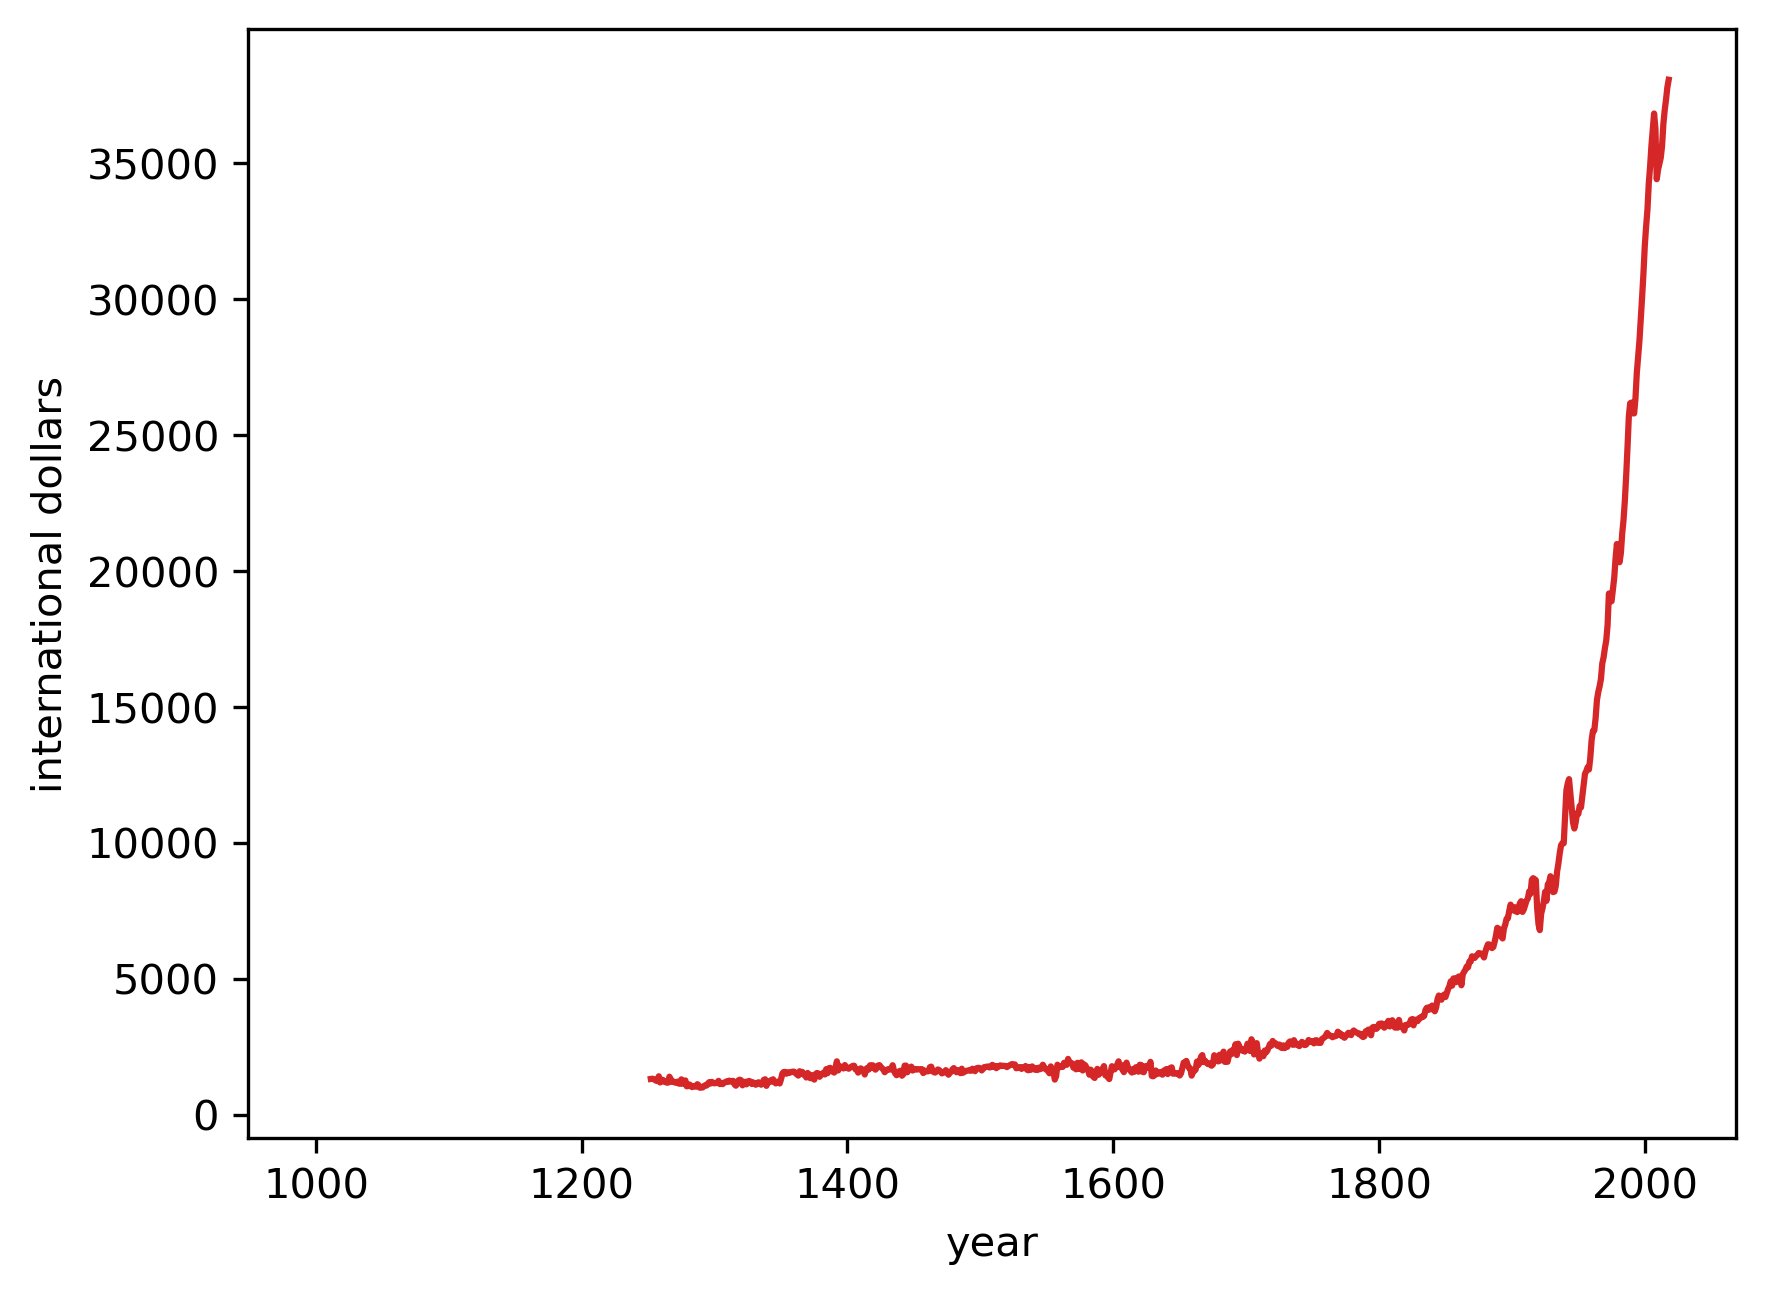

In [9]:
fig, ax = plt.subplots(dpi=300)
country = 'GBR'
gdp_pc[country].plot(
        ax=ax,
        ylabel='international dollars',
        xlabel='year',
        color=color_mapping[country]
    );

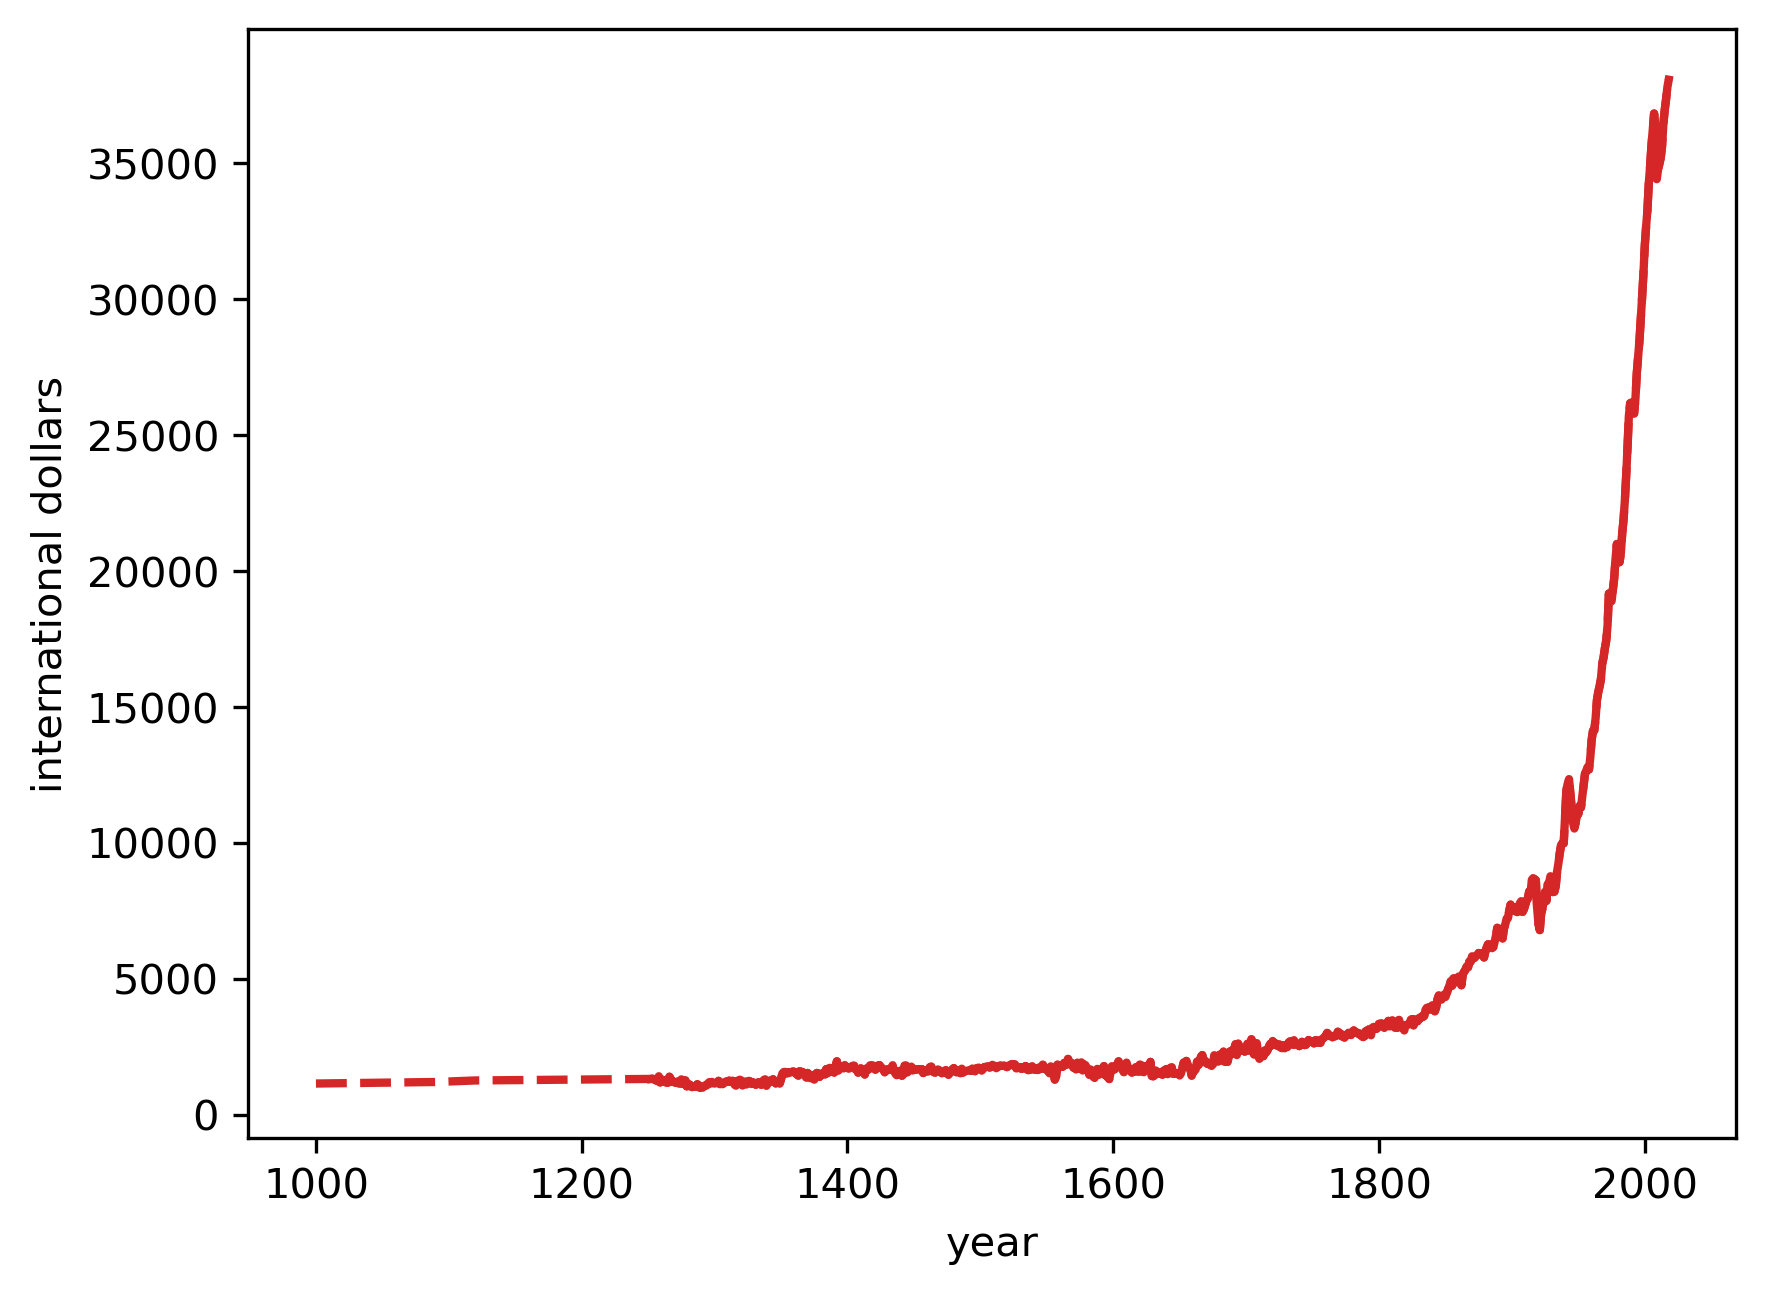

In [10]:
fig, ax = plt.subplots(dpi=300)
country = 'GBR'
ax.plot(gdp_pc[country].interpolate(),
        linestyle='--',
        lw=2,
        color=color_mapping[country])

ax.plot(gdp_pc[country],
        lw=2,
        color=color_mapping[country])
ax.set_ylabel('international dollars')
ax.set_xlabel('year')
plt.show()

In [11]:
def draw_interp_plots(series,        # pandas series
                      country,       # list of country codes
                      ylabel,        # label for y-axis
                      xlabel,        # label for x-axis
                      color_mapping, # code-color mapping
                      code_to_name,  # code-name mapping
                      lw,            # line width
                      logscale,      # log scale for y-axis
                      ax             # matplolib axis
                     ):

    for c in country:
        # Get the interpolated data
        df_interpolated = series[c].interpolate(limit_area='inside')
        interpolated_data = df_interpolated[series[c].isnull()]

        # Plot the interpolated data with dashed lines
        ax.plot(interpolated_data,
                linestyle='--',
                lw=lw,
                alpha=0.7,
                color=color_mapping[c])

        # Plot the non-interpolated data with solid lines
        ax.plot(series[c],
                lw=lw,
                color=color_mapping[c],
                alpha=0.8,
                label=code_to_name.loc[c]['country'])
        
        if logscale:
            ax.set_yscale('log')
    
    # Draw the legend outside the plot
    ax.legend(loc='upper left', frameon=False)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)

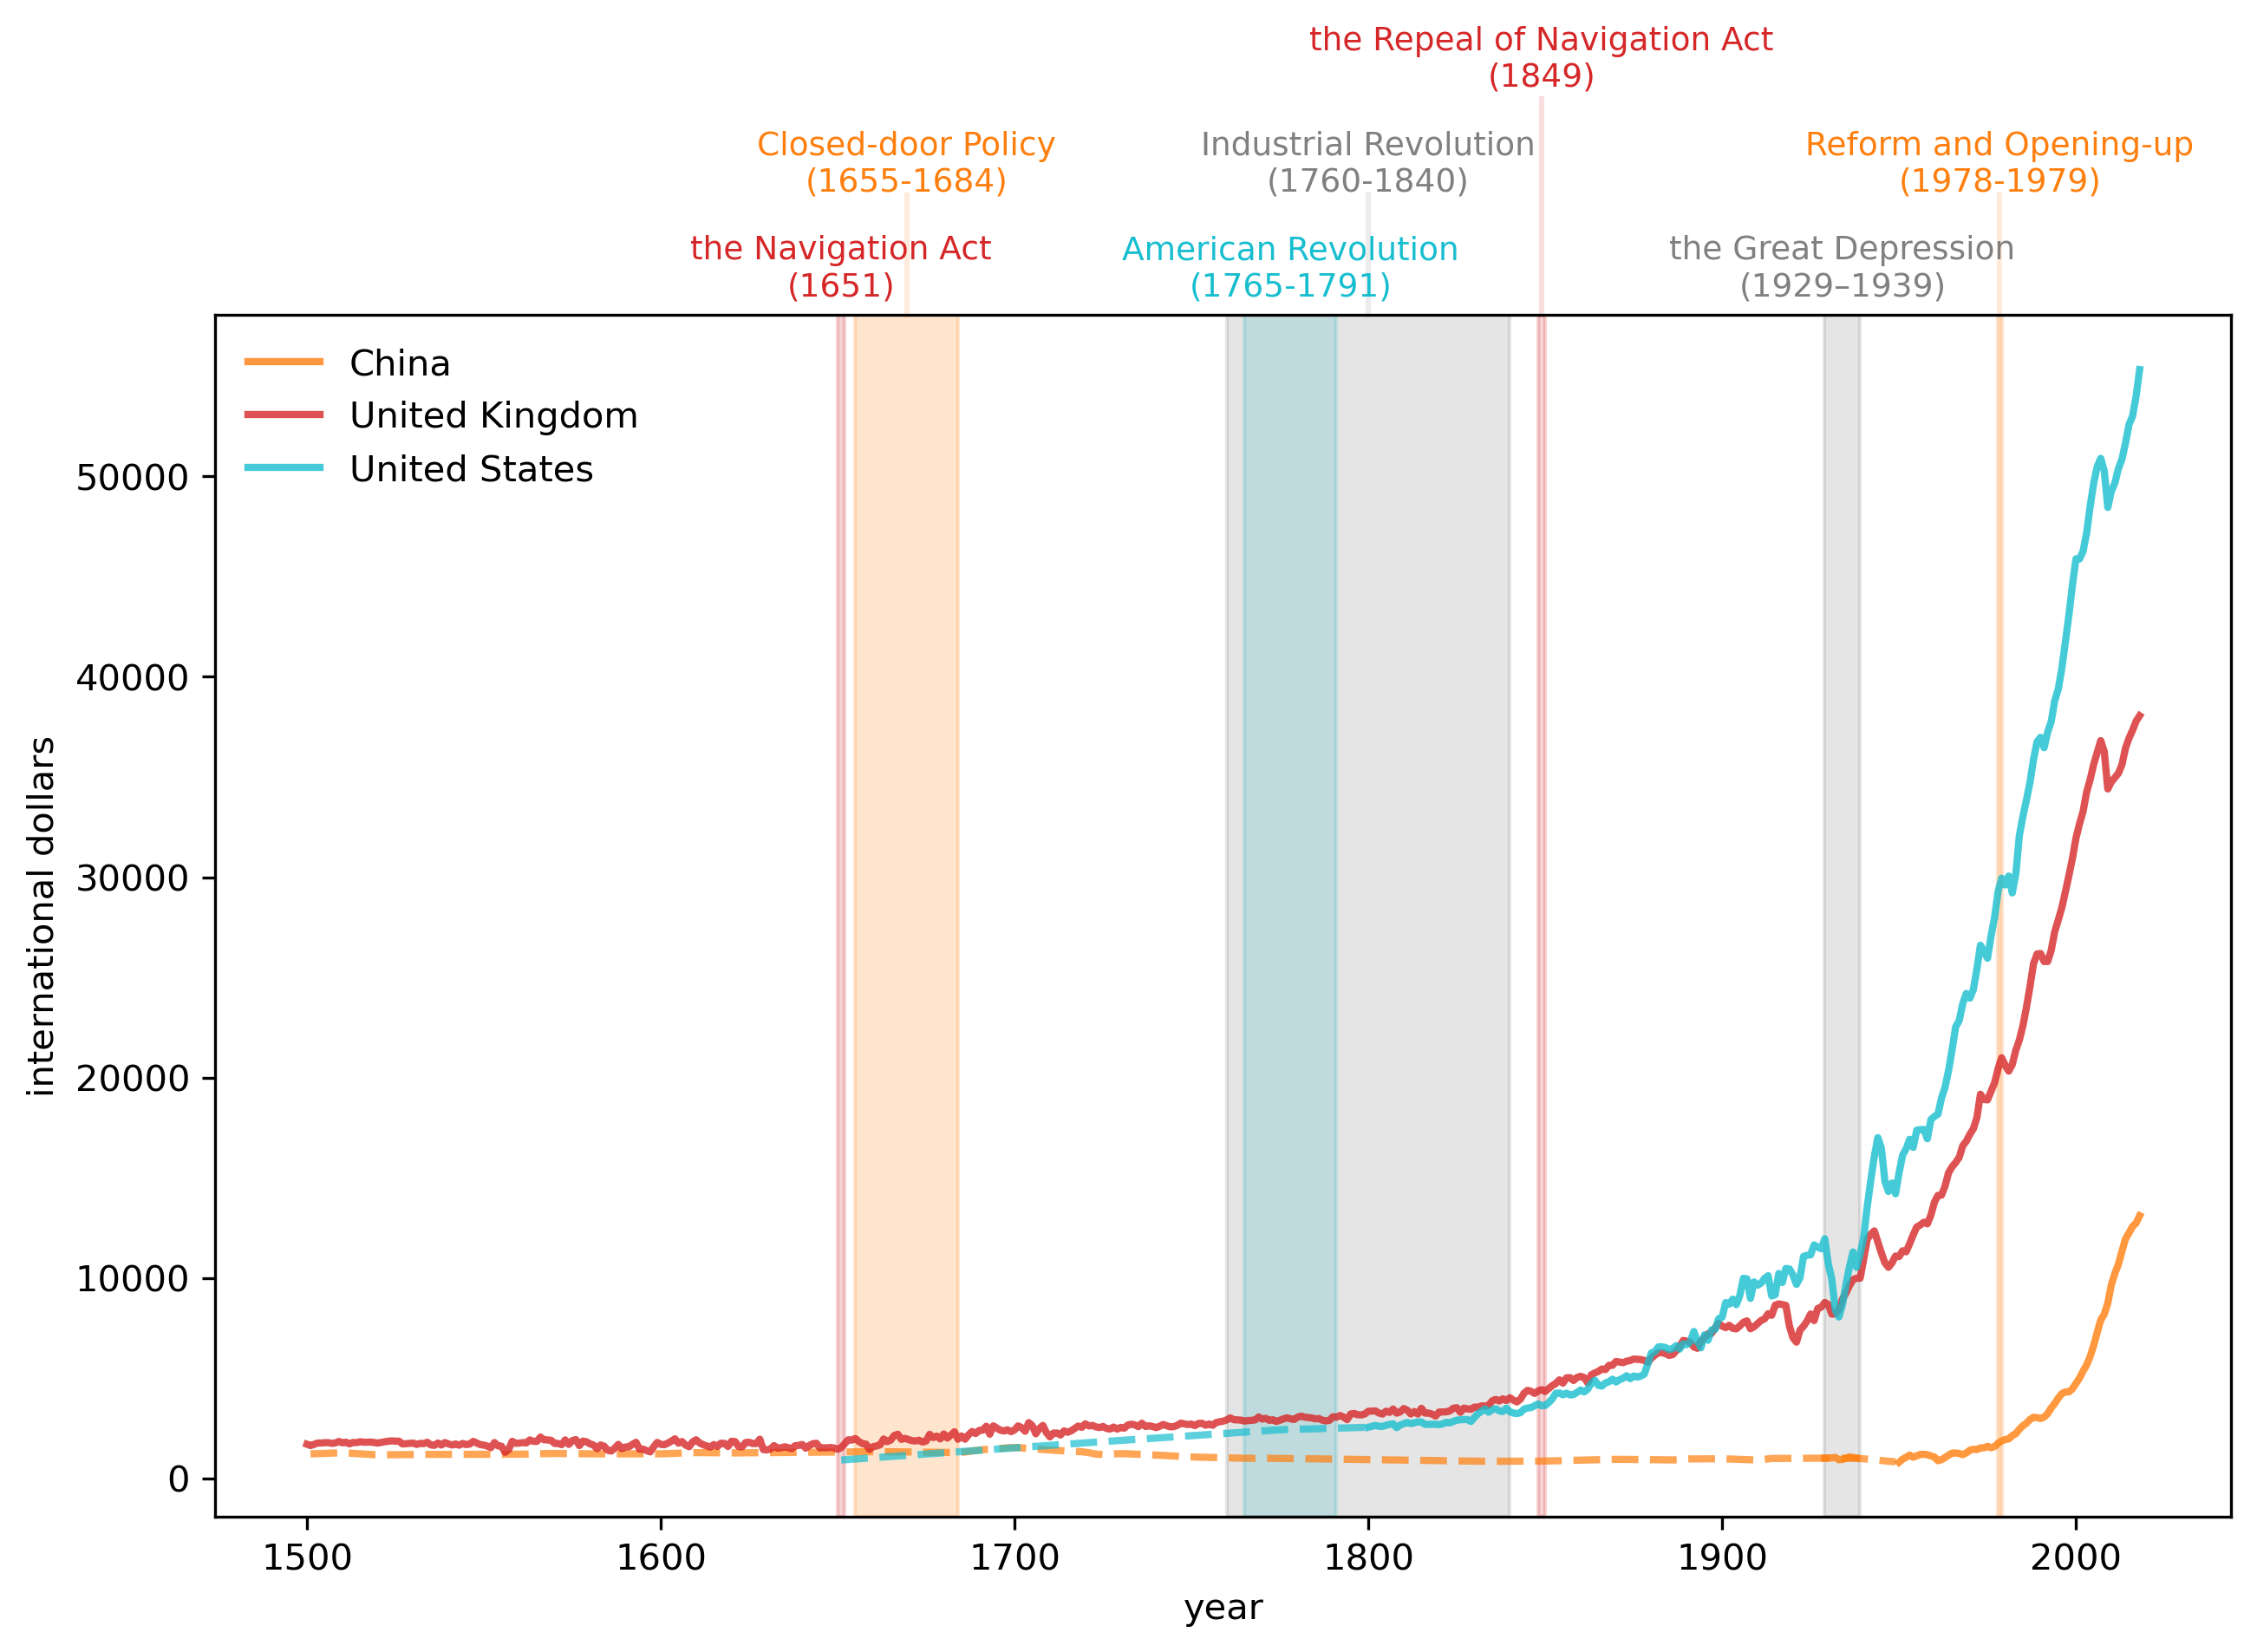

In [12]:
# Define the namedtuple for the events
Event = namedtuple('Event', ['year_range', 'y_text', 'text', 'color', 'ymax'])

fig, ax = plt.subplots(dpi=300, figsize=(10, 6))

country = ['CHN', 'GBR', 'USA']
draw_interp_plots(gdp_pc[country].loc[1500:], 
                  country,
                  'international dollars','year',
                  color_mapping, code_to_name, 2, False, ax)

# Define the parameters for the events and the text
ylim = ax.get_ylim()[1]
b_params = {'color':'grey', 'alpha': 0.2}
t_params = {'fontsize': 9, 
            'va':'center', 'ha':'center'}

# Create a list of events to annotate
events = [
    Event((1650, 1652), ylim + ylim*0.04, 
          'the Navigation Act\n(1651)',
          color_mapping['GBR'], 1),
    Event((1655, 1684), ylim + ylim*0.13, 
          'Closed-door Policy\n(1655-1684)', 
          color_mapping['CHN'], 1.1),
    Event((1848, 1850), ylim + ylim*0.22,
          'the Repeal of Navigation Act\n(1849)', 
          color_mapping['GBR'], 1.18),
    Event((1765, 1791), ylim + ylim*0.04, 
          'American Revolution\n(1765-1791)', 
          color_mapping['USA'], 1),
    Event((1760, 1840), ylim + ylim*0.13, 
          'Industrial Revolution\n(1760-1840)', 
          'grey', 1.1),
    Event((1929, 1939), ylim + ylim*0.04, 
          'the Great Depression\n(1929–1939)', 
          'grey', 1),
    Event((1978, 1979), ylim + ylim*0.13, 
          'Reform and Opening-up\n(1978-1979)', 
          color_mapping['CHN'], 1.1)
]

def draw_events(events, ax):
    # Iterate over events and add annotations and vertical lines
    for event in events:
        event_mid = sum(event.year_range)/2
        ax.text(event_mid, 
                event.y_text, event.text, 
                color=event.color, **t_params)
        ax.axvspan(*event.year_range, color=event.color, alpha=0.2)
        ax.axvline(event_mid, ymin=1, ymax=event.ymax, color=event.color,
                   clip_on=False, alpha=0.15)

# Draw events
draw_events(events, ax)
plt.show()

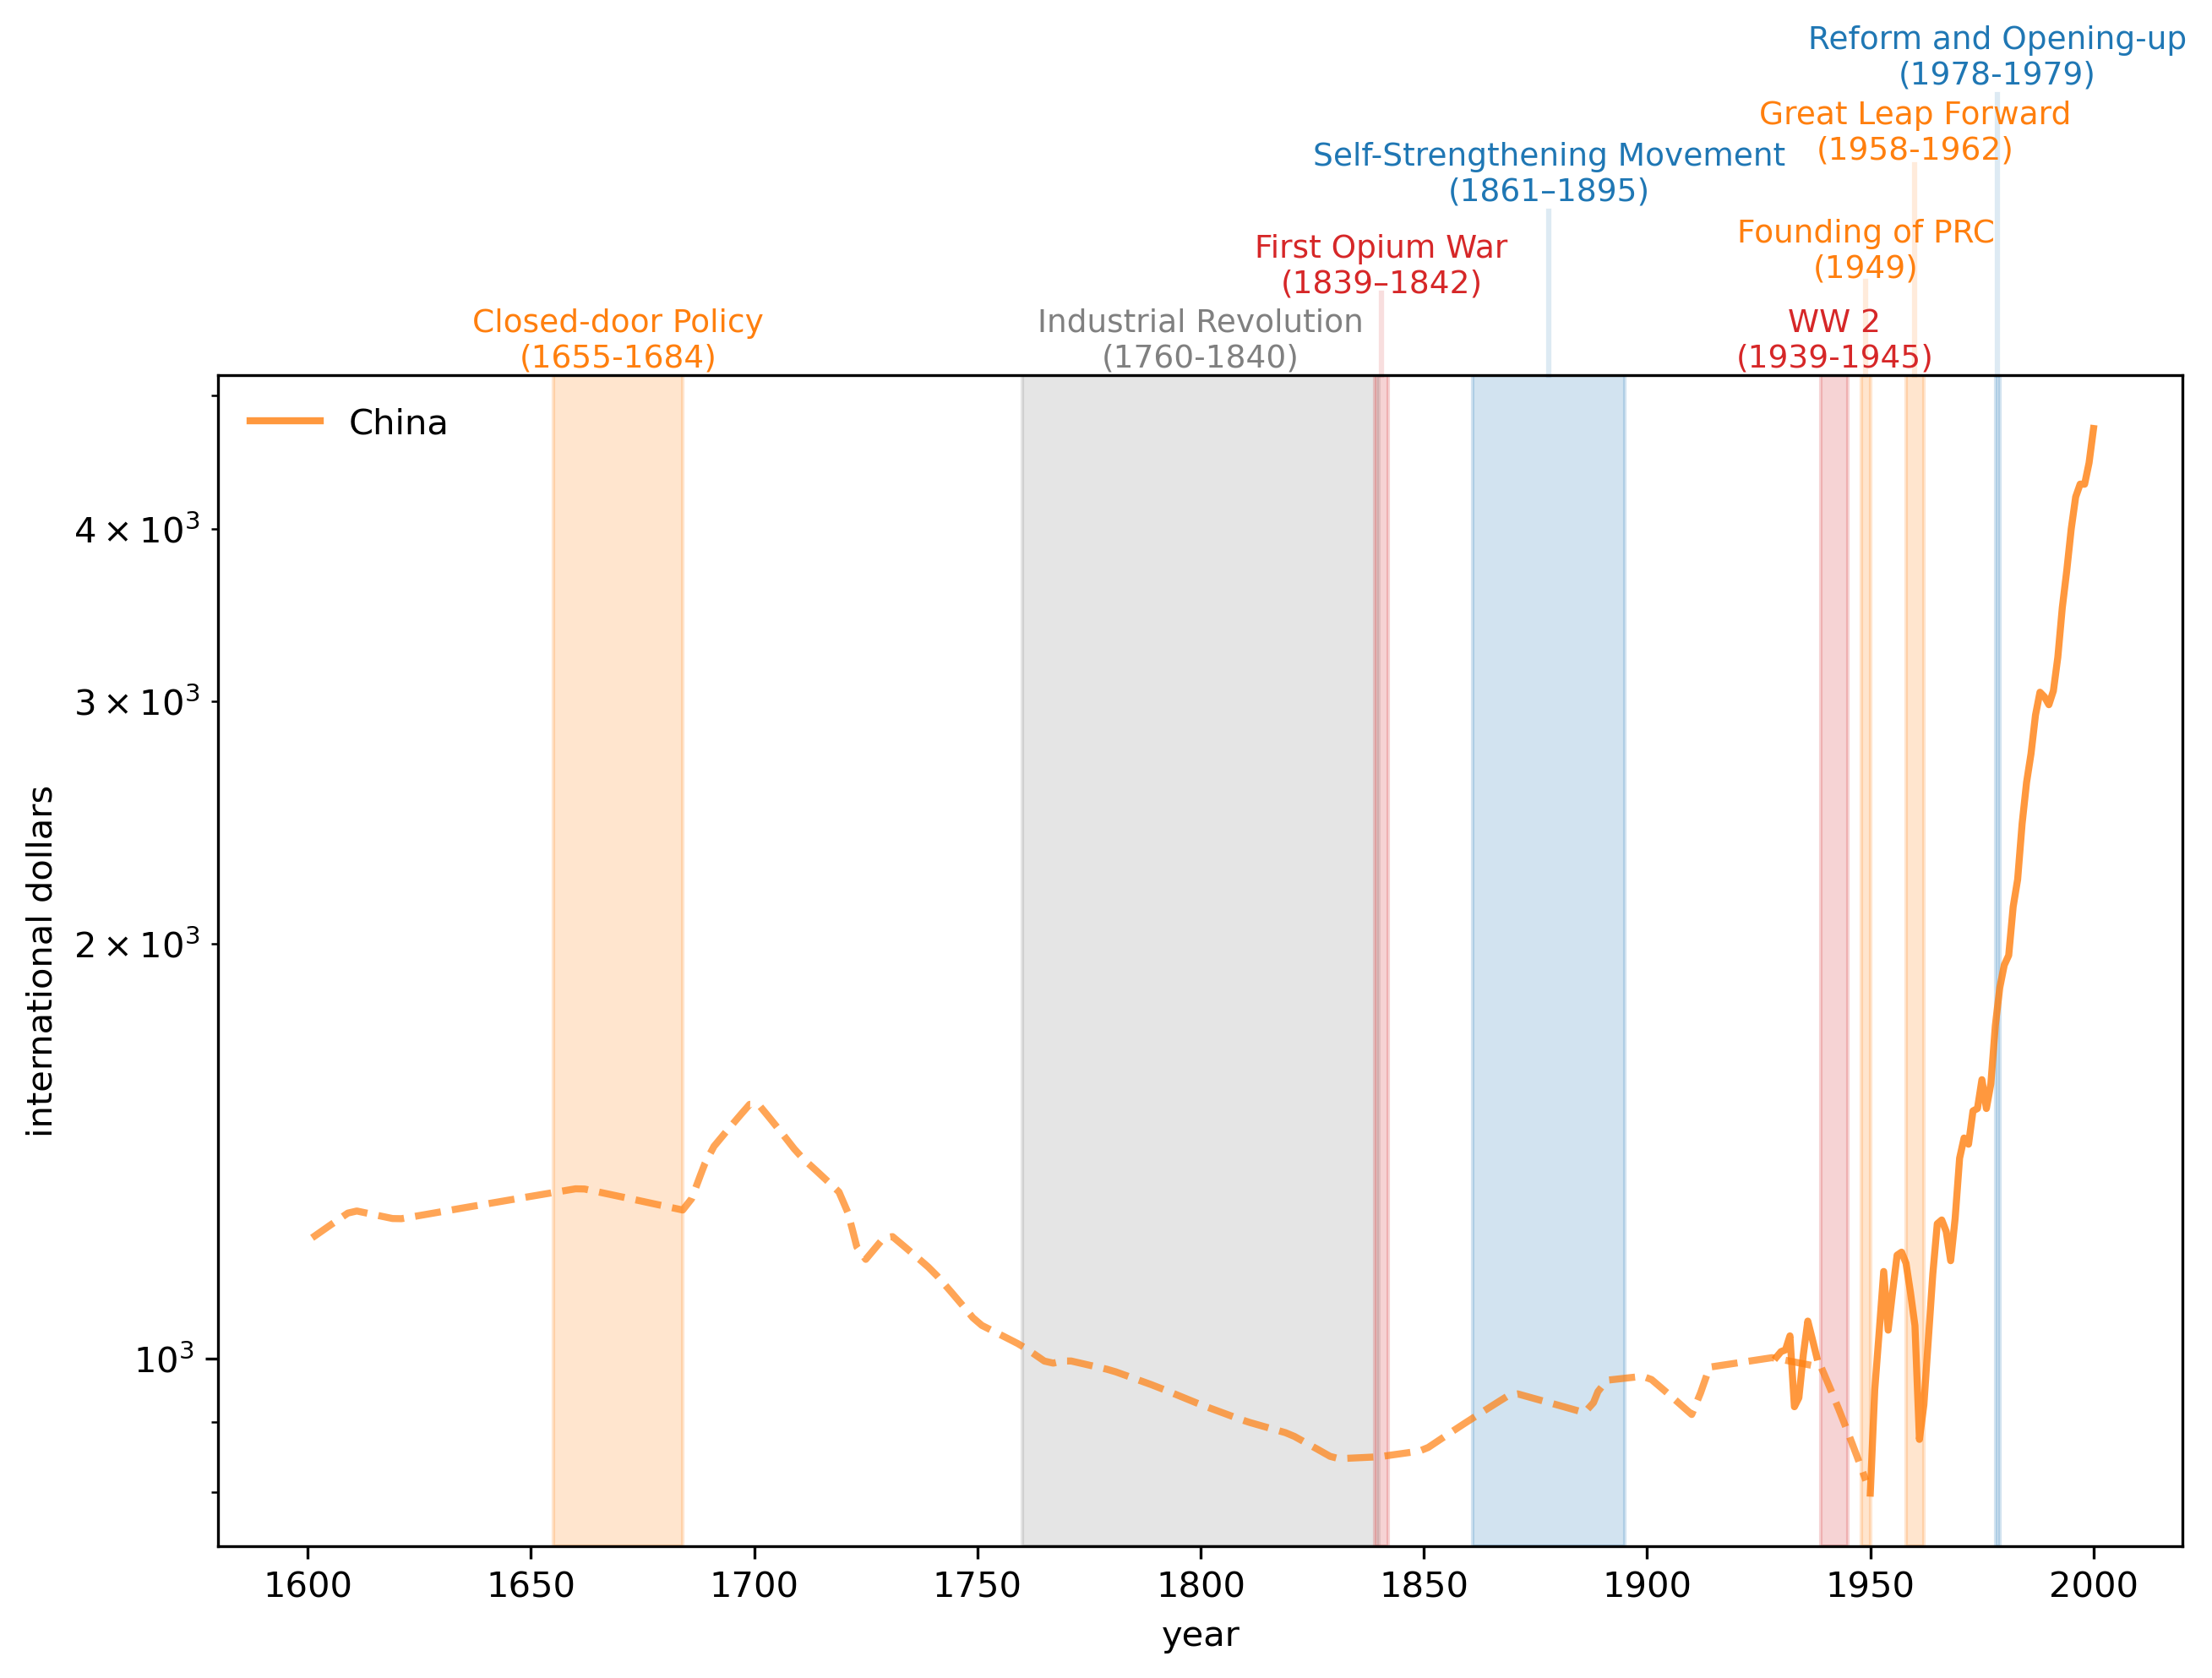

In [13]:
fig, ax = plt.subplots(dpi=300, figsize=(10, 6))

country = ['CHN']
draw_interp_plots(gdp_pc[country].loc[1600:2000], 
                  country,
                  'international dollars','year',
                  color_mapping, code_to_name, 2, True, ax)

ylim = ax.get_ylim()[1]

events = [
Event((1655, 1684), ylim + ylim*0.06, 
      'Closed-door Policy\n(1655-1684)', 
      'tab:orange', 1),
Event((1760, 1840), ylim + ylim*0.06, 
      'Industrial Revolution\n(1760-1840)', 
      'grey', 1),
Event((1839, 1842), ylim + ylim*0.2, 
      'First Opium War\n(1839–1842)', 
      'tab:red', 1.07),
Event((1861, 1895), ylim + ylim*0.4, 
      'Self-Strengthening Movement\n(1861–1895)', 
      'tab:blue', 1.14),
Event((1939, 1945), ylim + ylim*0.06, 
      'WW 2\n(1939-1945)', 
      'tab:red', 1),
Event((1948, 1950), ylim + ylim*0.23, 
      'Founding of PRC\n(1949)', 
      color_mapping['CHN'], 1.08),
Event((1958, 1962), ylim + ylim*0.5, 
      'Great Leap Forward\n(1958-1962)', 
      'tab:orange', 1.18),
Event((1978, 1979), ylim + ylim*0.7, 
      'Reform and Opening-up\n(1978-1979)', 
      'tab:blue', 1.24)
]

# Draw events
draw_events(events, ax)
plt.show()

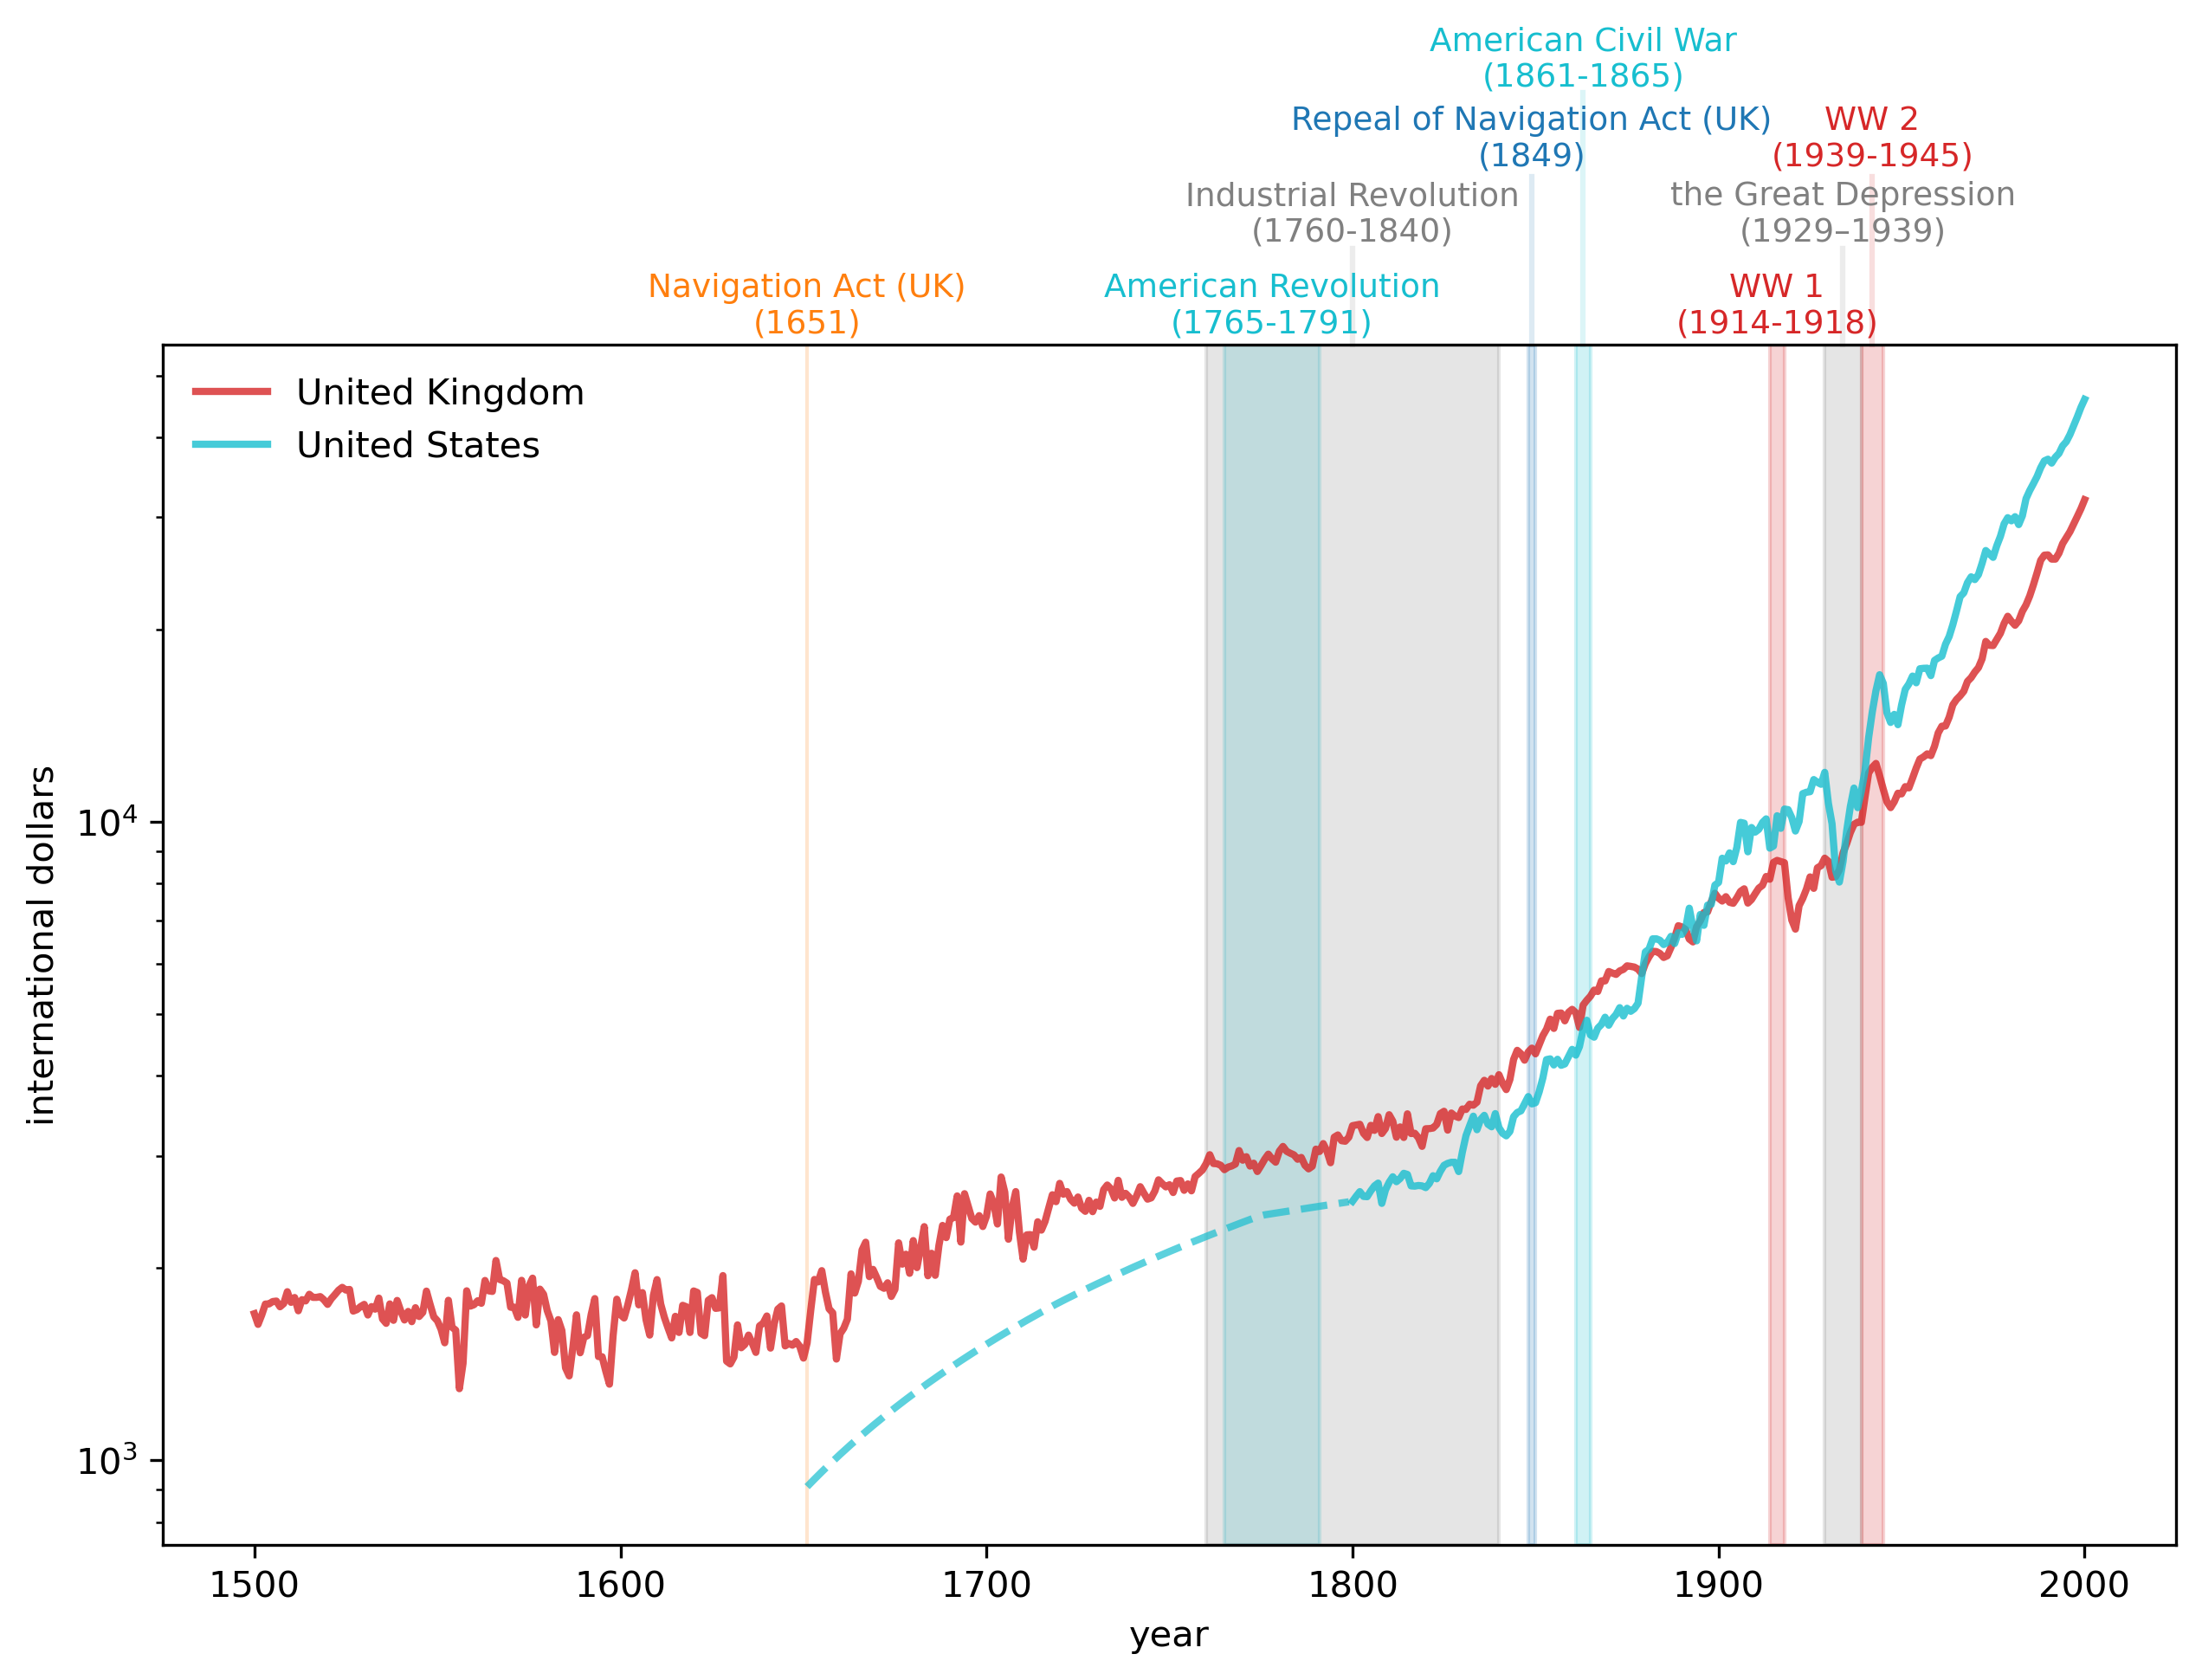

In [14]:
fig, ax = plt.subplots(dpi=300, figsize=(10, 6))

country = ['GBR', 'USA']
draw_interp_plots(gdp_pc[country].loc[1500:2000],
                  country,
                  'international dollars','year',
                  color_mapping, code_to_name, 2, True, ax)

ylim = ax.get_ylim()[1]

# Create a list of data points
events = [
    Event((1651, 1651), ylim + ylim*0.15, 
          'Navigation Act (UK)\n(1651)', 
          'tab:orange', 1),
    Event((1765, 1791), ylim + ylim*0.15, 
          'American Revolution\n(1765-1791)',
          color_mapping['USA'], 1),
    Event((1760, 1840), ylim + ylim*0.6, 
          'Industrial Revolution\n(1760-1840)', 
          'grey', 1.08),
    Event((1848, 1850), ylim + ylim*1.1, 
          'Repeal of Navigation Act (UK)\n(1849)', 
          'tab:blue', 1.14),
    Event((1861, 1865), ylim + ylim*1.8, 
          'American Civil War\n(1861-1865)', 
          color_mapping['USA'], 1.21),
    Event((1914, 1918), ylim + ylim*0.15, 
          'WW 1\n(1914-1918)', 
          'tab:red', 1),
    Event((1929, 1939), ylim + ylim*0.6, 
          'the Great Depression\n(1929–1939)', 
          'grey', 1.08),
    Event((1939, 1945), ylim + ylim*1.1, 
          'WW 2\n(1939-1945)', 
          'tab:red', 1.14)
]

# Draw events
draw_events(events, ax)
plt.show()

In [15]:
data = pd.read_excel(data_url, sheet_name='Full data')
data.set_index(['countrycode', 'year'], inplace=True)
data['gdp'] = data['gdppc'] * data['pop']
gdp = data['gdp'].unstack('countrycode')

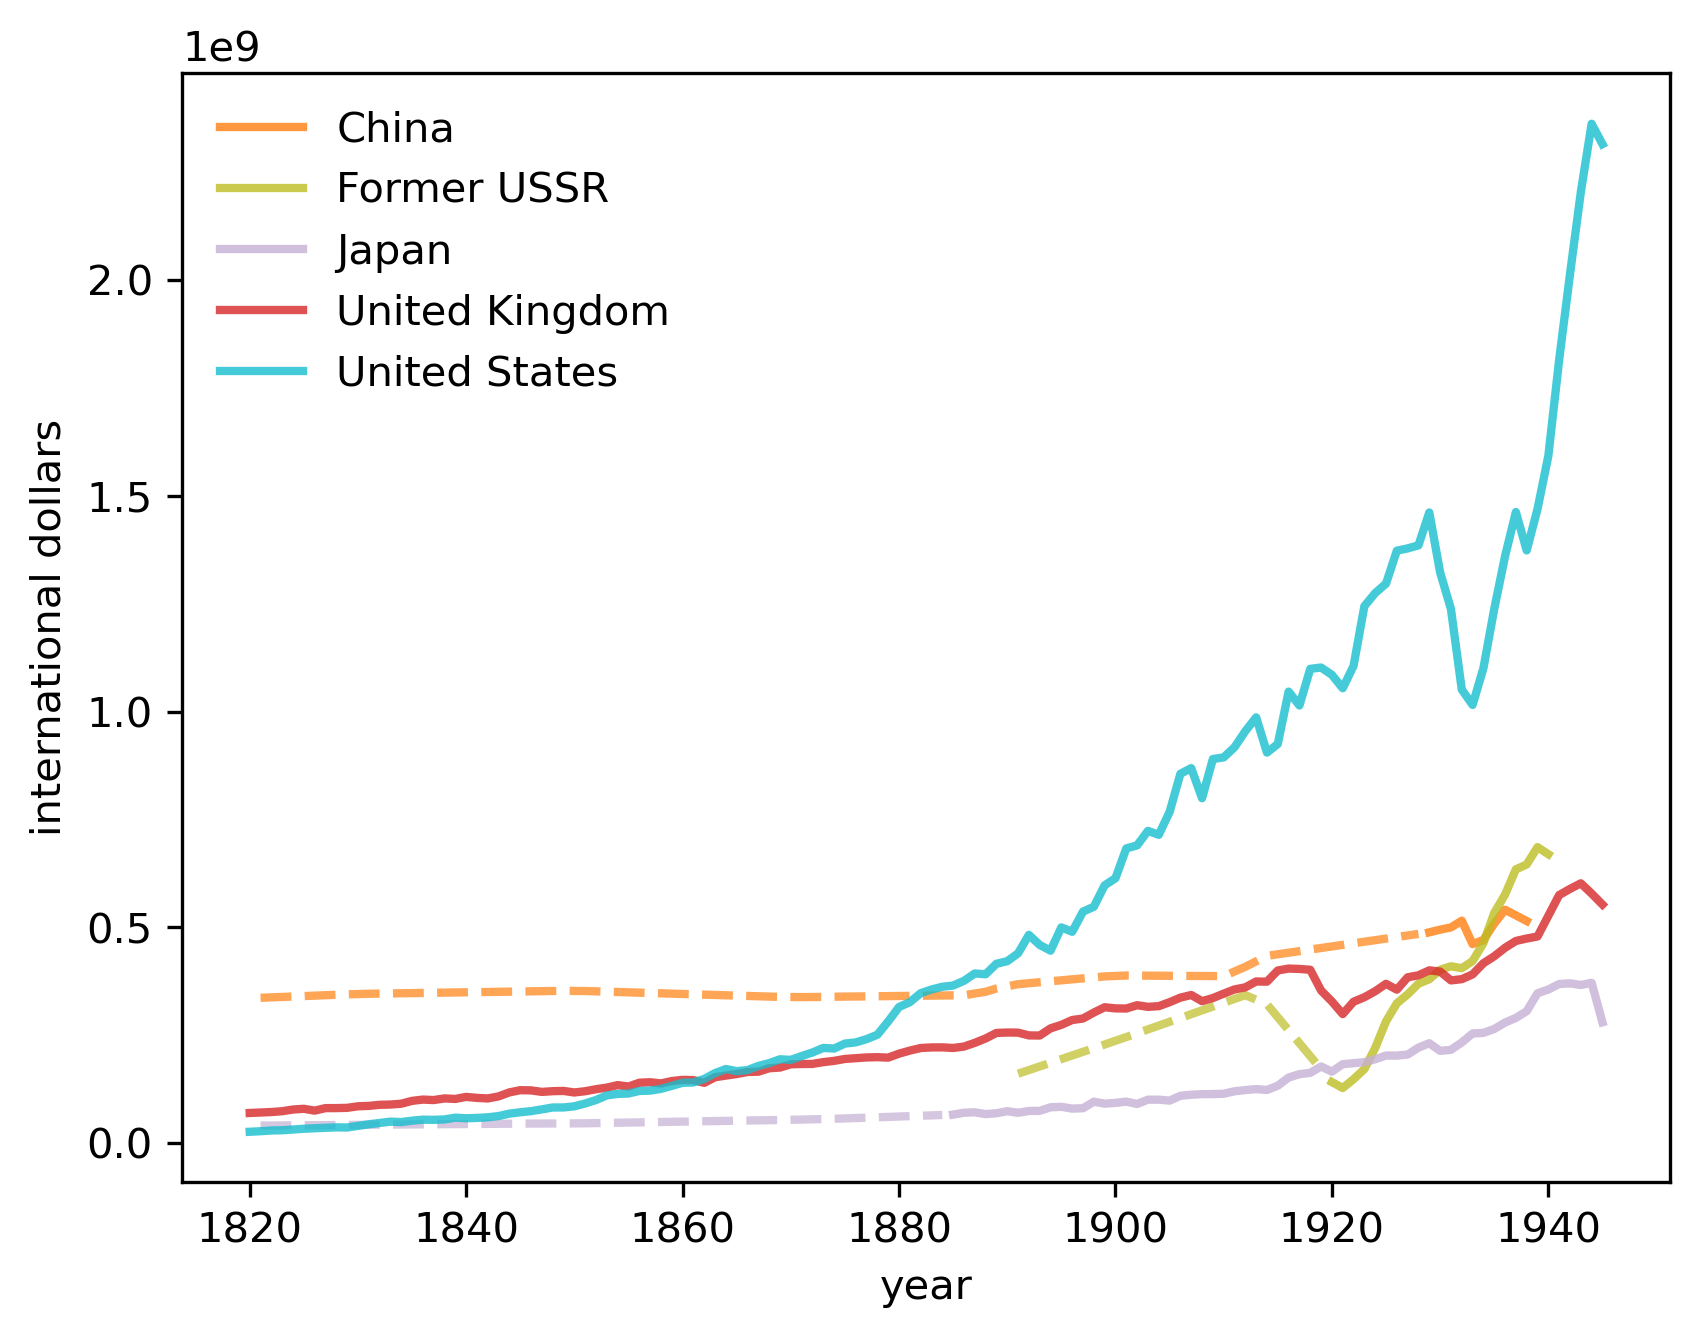

In [16]:
fig, ax = plt.subplots(dpi=300)
country = ['CHN', 'SUN', 'JPN', 'GBR', 'USA']
start_year, end_year = (1820, 1945)
draw_interp_plots(gdp[country].loc[start_year:end_year], 
                  country,
                  'international dollars', 'year',
                  color_mapping, code_to_name, 2, False, ax)

In [17]:
BEM = ['GBR', 'IND', 'AUS', 'NZL', 'CAN', 'ZAF']
# Interpolate incomplete time-series
gdp['BEM'] = gdp[BEM].loc[start_year-1:end_year].interpolate(method='index').sum(axis=1)

In [18]:
# Define colour mapping and name for BEM
color_mapping['BEM'] = color_mapping['GBR']  # Set the color to be the same as Great Britain
# Add British Empire to code_to_name
bem = pd.DataFrame(["British Empire"], index=["BEM"], columns=['country'])
bem.index.name = 'countrycode'
code_to_name = pd.concat([code_to_name, bem])

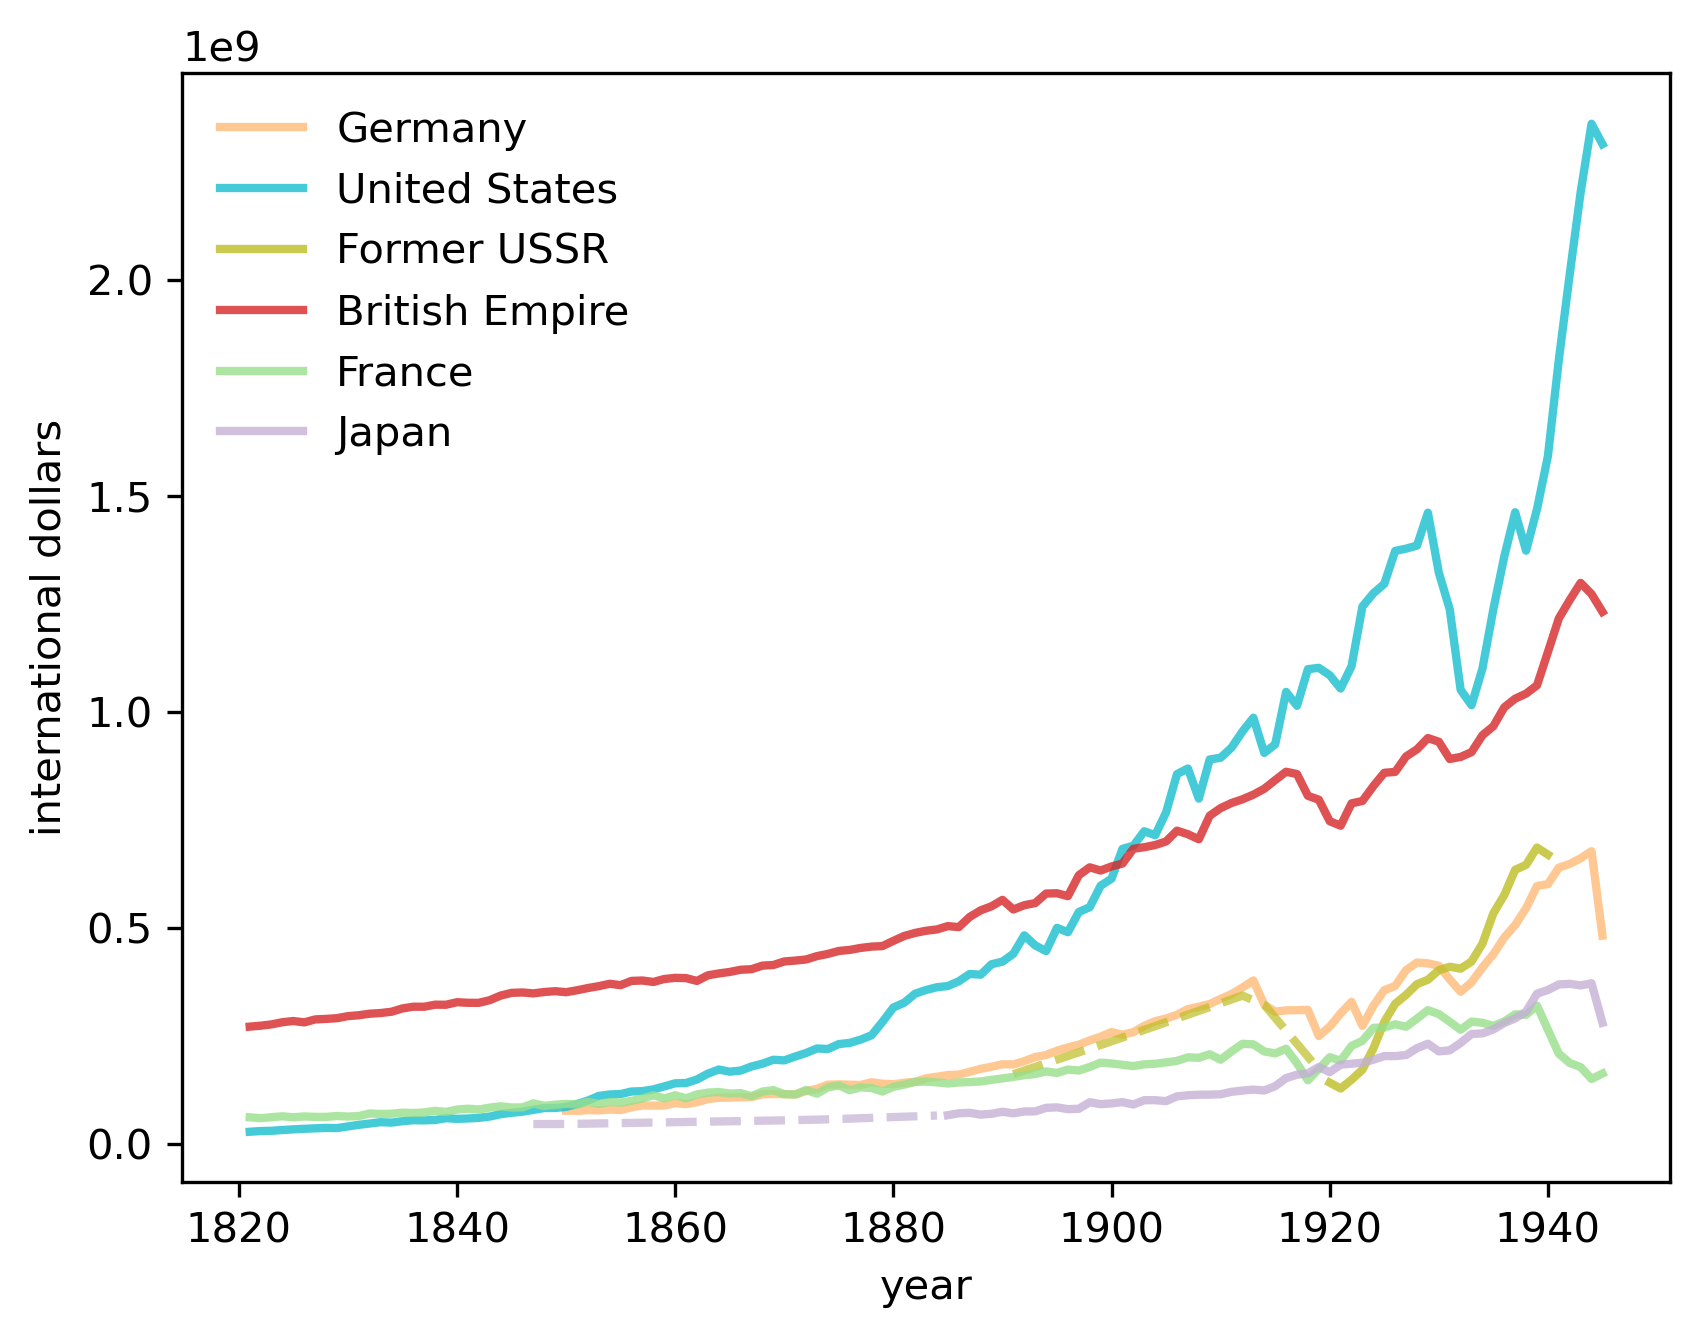

In [19]:
fig, ax = plt.subplots(dpi=300)
country = ['DEU', 'USA', 'SUN', 'BEM', 'FRA', 'JPN']
start_year, end_year = (1821, 1945)
draw_interp_plots(gdp[country].loc[start_year:end_year], 
                  country,
                  'international dollars', 'year',
                  color_mapping, code_to_name, 2, False, ax)

plt.savefig("./_static/lecture_specific/long_run_growth/tooze_ch1_graph.png", dpi=300,
            bbox_inches='tight')
plt.show()

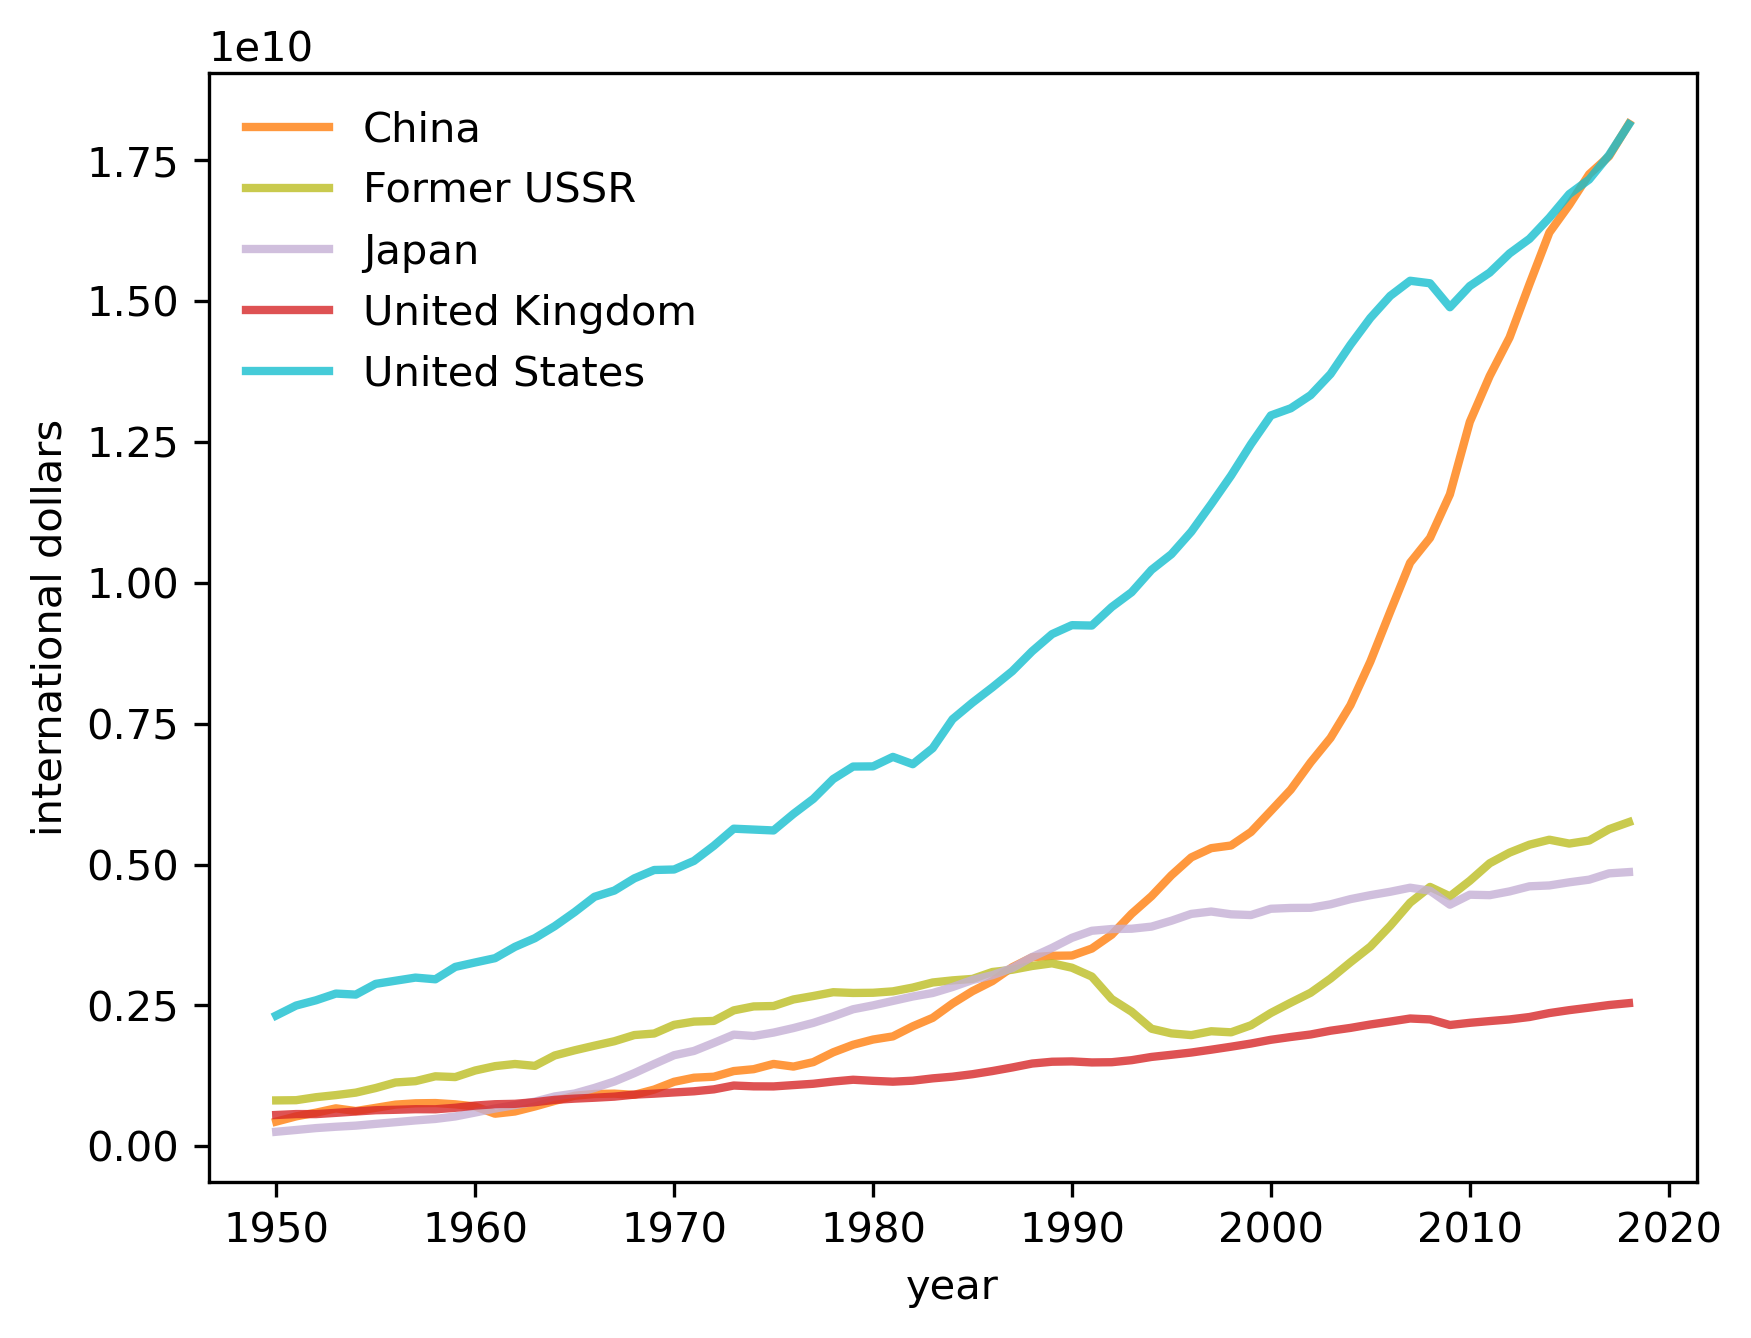

In [20]:
fig, ax = plt.subplots(dpi=300)
country = ['CHN', 'SUN', 'JPN', 'GBR', 'USA']
start_year, end_year = (1950, 2020)
draw_interp_plots(gdp[country].loc[start_year:end_year], 
                  country,
                  'international dollars', 'year',
                  color_mapping, code_to_name, 2, False, ax)

In [21]:
data = pd.read_excel(data_url, 
                     sheet_name='Regional data', 
                     header=(0,1,2),
                     index_col=0)
data.columns = data.columns.droplevel(level=2)

In [22]:
regionalgdp_pc = data['gdppc_2011'].copy()
regionalgdp_pc.index = pd.to_datetime(regionalgdp_pc.index, format='%Y')

In [23]:
regionalgdp_pc.interpolate(method='time', inplace=True)

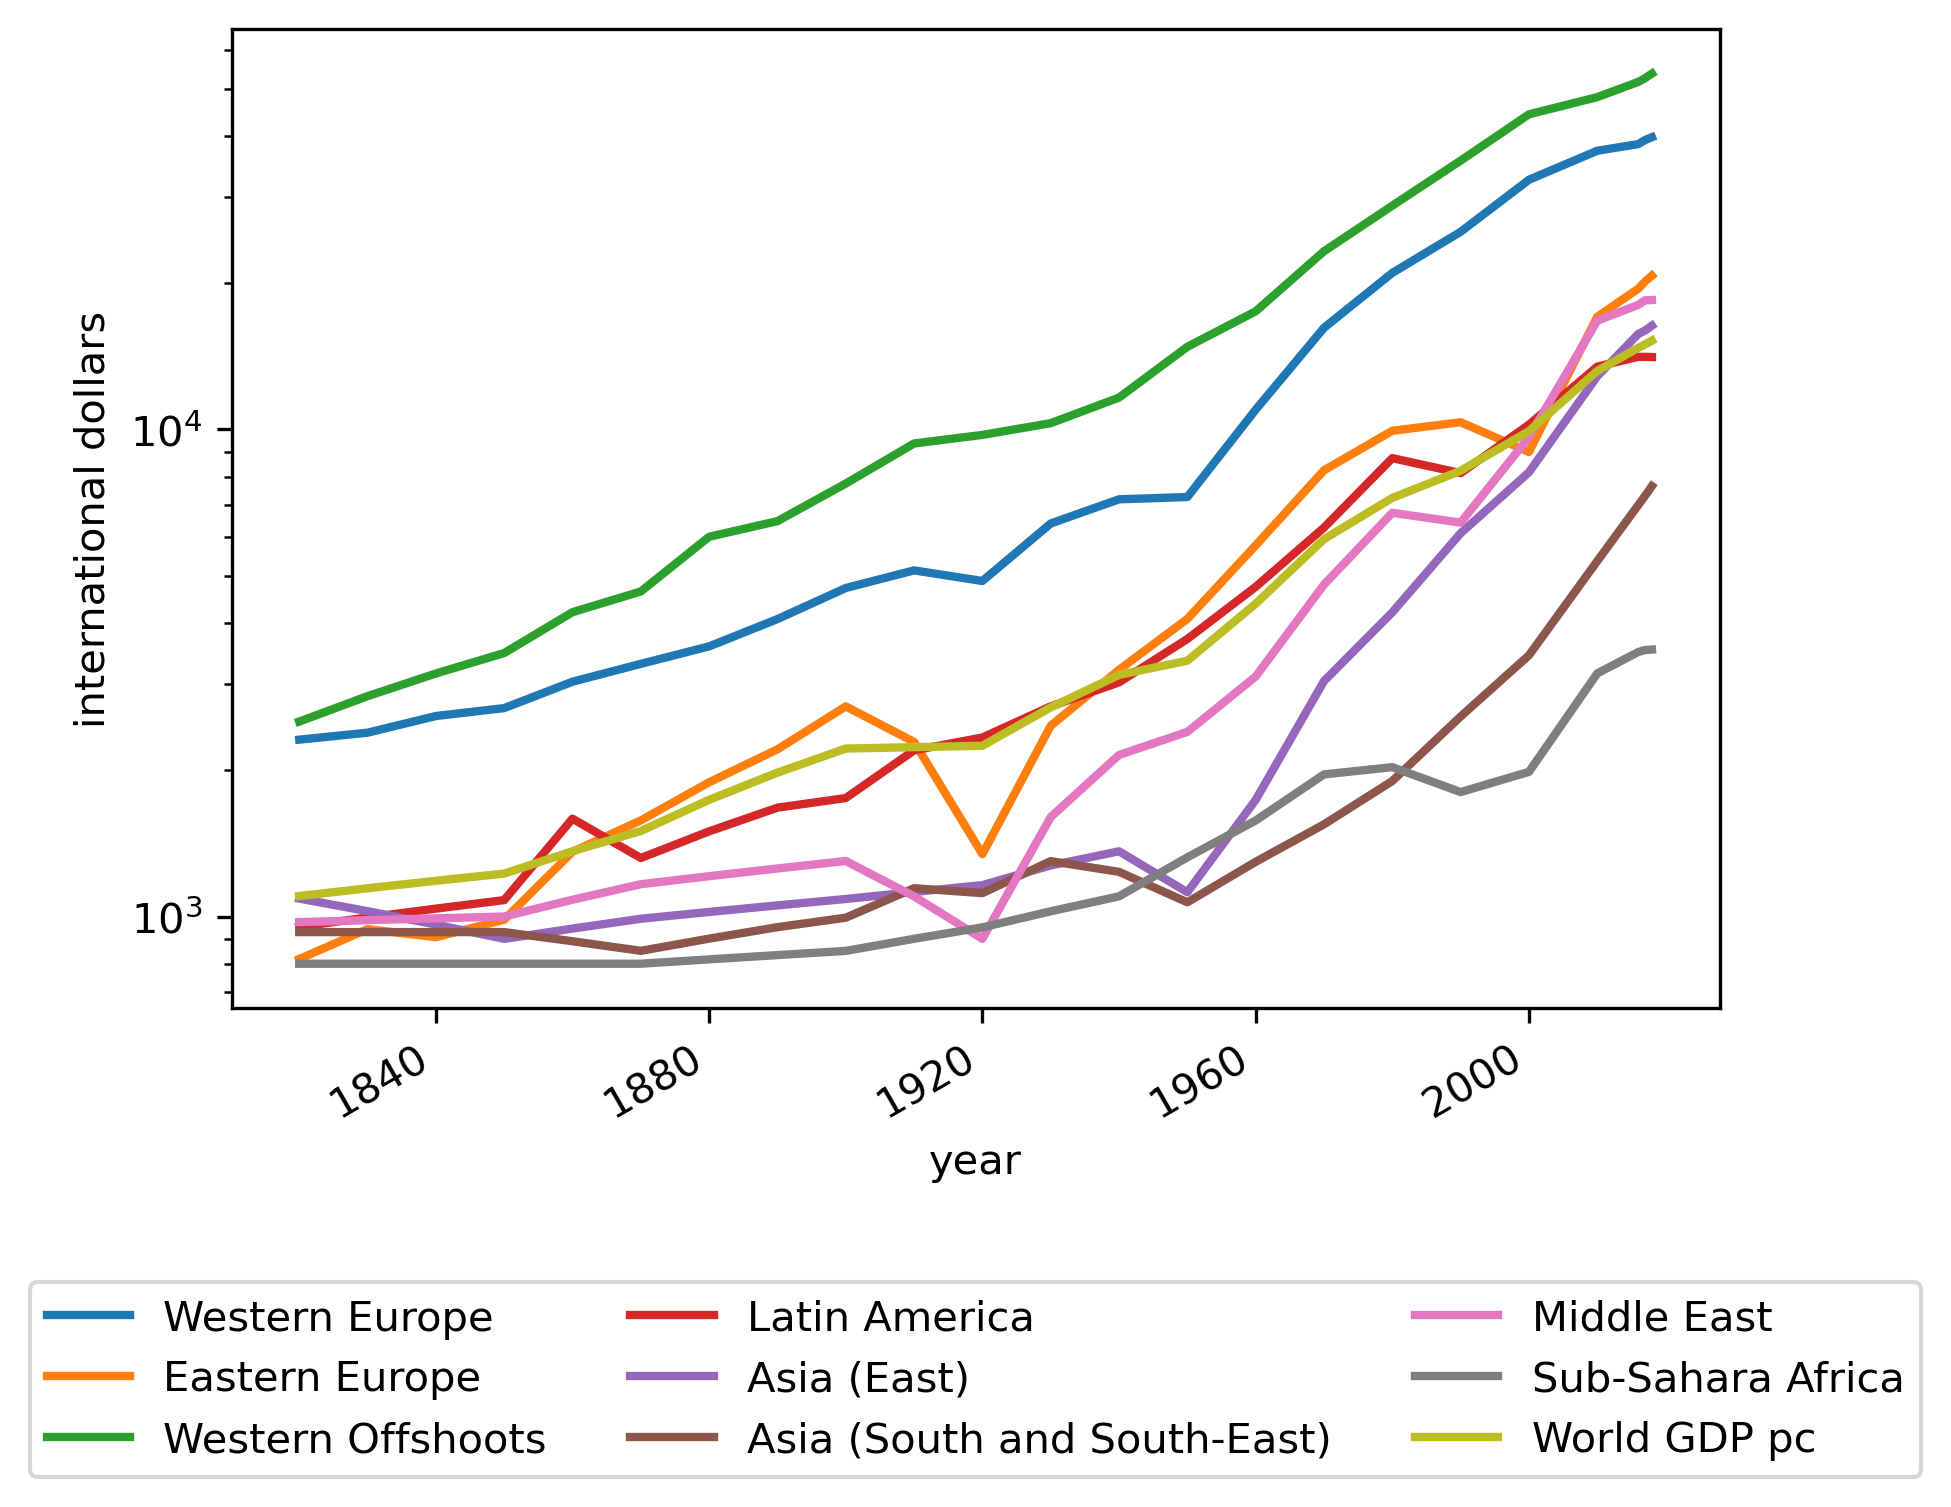

In [24]:
fig, ax = plt.subplots(dpi=300)
regionalgdp_pc.plot(ax=ax, xlabel='year',
                    lw=2,
                    ylabel='international dollars')
ax.set_yscale('log')
plt.legend(loc='lower center',
           ncol=3, bbox_to_anchor=[0.5, -0.5])
plt.show()